In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sp500 = yf.download('^GSPC', start='2018-01-01', end='2022-12-31', progress=False)

YF.download() has changed argument auto_adjust default to True


In [3]:
prices = sp500['Close']

In [4]:
scaled_prices = []

for i in range(len(prices)):
    x = prices.squeeze().iloc[i]
    y = (x - prices.squeeze().min()) / (prices.squeeze().max() - prices.squeeze().min())
    scaled_prices.append(y)

In [5]:
log_returns = []

for i in range(1,len(prices)):
    x = np.log(prices.squeeze().iloc[i]) - np.log(prices.squeeze().iloc[i-1])
    log_returns.append(x)

log_returns.insert(0,0)

In [6]:
smooth_prices = []
smooth_prices.append(prices.squeeze().iloc[1])
alpha = 2/5

for i in range(2, len(prices)):
    x = prices.squeeze().iloc[i]
    y = smooth_prices[-1]
    z = prices.squeeze().iloc[i-2]

    p = alpha * (x + (0.5 * (x-z))) + (1-alpha) * y
    smooth_prices.append(p)

In [7]:
X = pd.DataFrame({
    'SPrices': smooth_prices
    # 'Close Prices': prices.squeeze(),
    # 'Log Returns': log_returns,
    # 'Scaled Prices': scaled_prices
})

X['PCT'] = X['SPrices'].pct_change() * 100
X['PCT-1'] = X['PCT'].shift(1)
X['PCT-2'] = X['PCT'].shift(2)
X['PCT-3'] = X['PCT'].shift(3)
X['PCT-4'] = X['PCT'].shift(4)
X['PCT-5'] = X['PCT'].shift(5)
X['PCT-6'] = X['PCT'].shift(6)
X['PCT-7'] = X['PCT'].shift(7)

X['Volatility'] = X['PCT'].rolling(window=5).std().shift(1)

X = X.dropna()
X

,SPrices,PCT,PCT-1,PCT-2,PCT-3,PCT-4,PCT-5,PCT-6,PCT-7,Volatility
8,2779.142909,0.040963,0.658009,0.384347,-0.019108,0.134895,0.328100,0.515989,0.368881,0.257452
9,2791.773782,0.454488,0.040963,0.658009,0.384347,-0.019108,0.134895,0.328100,0.515989,0.279896
10,2798.598303,0.244451,0.454488,0.040963,0.658009,0.384347,-0.019108,0.134895,0.328100,0.286361
11,2804.826999,0.222565,0.244451,0.454488,0.040963,0.658009,0.384347,-0.019108,0.134895,0.230978
12,2823.072176,0.650492,0.222565,0.244451,0.454488,0.040963,0.658009,0.384347,-0.019108,0.237337
...,...,...,...,...,...,...,...,...,...,...
1253,3837.492359,-0.164459,-0.363572,0.888984,-0.305845,-0.980367,-1.569919,-1.690955,-0.088576,0.915878
1254,3835.567437,-0.050161,-0.164459,-0.363572,0.888984,-0.305845,-0.980367,-1.569919,-1.690955,0.676935
1255,3802.308431,-0.867121,-0.050161,-0.164459,-0.363572,0.888984,-0.305845,-0.980367,-1.569919,0.511267
1256,3825.103076,0.599495,-0.867121,-0.050161,-0.164459,-0.363572,0.888984,-0.305845,-0.980367,0.640710


In [8]:
sma_windows = [20, 50, 100, 200]

# Compute multiple SMAs
for window in sma_windows:
    X[f"SMA_{window}"] = X['PCT'].rolling(window=window).mean().shift(1)

X = X.dropna()
X

,SPrices,PCT,PCT-1,PCT-2,PCT-3,PCT-4,PCT-5,PCT-6,PCT-7,Volatility,SMA_20,SMA_50,SMA_100,SMA_200
208,2668.067410,0.667387,-1.027897,-0.444147,-0.045632,-2.059204,-0.495295,-0.286645,-0.531826,0.778627,-0.480110,-0.140203,-0.042675,-0.021347
209,2699.634440,1.183142,0.667387,-1.027897,-0.444147,-0.045632,-2.059204,-0.495295,-0.286645,1.030609,-0.452101,-0.132285,-0.037816,-0.018215
210,2727.476758,1.031337,1.183142,0.667387,-1.027897,-0.444147,-0.045632,-2.059204,-0.495295,0.877353,-0.394662,-0.113034,-0.027857,-0.014572
211,2727.974092,0.018234,1.031337,1.183142,0.667387,-1.027897,-0.444147,-0.045632,-2.059204,0.970207,-0.320005,-0.093602,-0.019089,-0.010638
212,2731.696467,0.136452,0.018234,1.031337,1.183142,0.667387,-1.027897,-0.444147,-0.045632,0.903433,-0.287929,-0.091098,-0.017201,-0.011659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,3837.492359,-0.164459,-0.363572,0.888984,-0.305845,-0.980367,-1.569919,-1.690955,-0.088576,0.915878,-0.214348,0.144903,-0.058869,-0.043050
1254,3835.567437,-0.050161,-0.164459,-0.363572,0.888984,-0.305845,-0.980367,-1.569919,-1.690955,0.676935,-0.233314,0.113577,-0.067694,-0.046902
1255,3802.308431,-0.867121,-0.050161,-0.164459,-0.363572,0.888984,-0.305845,-0.980367,-1.569919,0.511267,-0.190018,0.123353,-0.073333,-0.042563
1256,3825.103076,0.599495,-0.867121,-0.050161,-0.164459,-0.363572,0.888984,-0.305845,-0.980367,0.640710,-0.201176,0.091297,-0.081012,-0.042340


In [9]:
Data = pd.DataFrame()

Data['PCT today'] = X['PCT']
Data['PCT today-1'] = X['PCT-1']
Data['PCT today-2'] = X['PCT-2']
Data['PCT today-3'] = X['PCT-3']
Data['PCT today-4'] = X['PCT-4']
Data['PCT today-5'] = X['PCT-5']
Data['PCT today-6'] = X['PCT-6']
Data['PCT today-7'] = X['PCT-7']
Data['Volatility'] = X['Volatility']
Data['SMA_20'] = X['SMA_20']
Data['SMA_50'] = X['SMA_50']
Data['SMA_100'] = X['SMA_100']
Data['SMA_200'] = X['SMA_200']

Data = Data.dropna()

Data

,PCT today,PCT today-1,PCT today-2,PCT today-3,PCT today-4,PCT today-5,PCT today-6,PCT today-7,Volatility,SMA_20,SMA_50,SMA_100,SMA_200
208,0.667387,-1.027897,-0.444147,-0.045632,-2.059204,-0.495295,-0.286645,-0.531826,0.778627,-0.480110,-0.140203,-0.042675,-0.021347
209,1.183142,0.667387,-1.027897,-0.444147,-0.045632,-2.059204,-0.495295,-0.286645,1.030609,-0.452101,-0.132285,-0.037816,-0.018215
210,1.031337,1.183142,0.667387,-1.027897,-0.444147,-0.045632,-2.059204,-0.495295,0.877353,-0.394662,-0.113034,-0.027857,-0.014572
211,0.018234,1.031337,1.183142,0.667387,-1.027897,-0.444147,-0.045632,-2.059204,0.970207,-0.320005,-0.093602,-0.019089,-0.010638
212,0.136452,0.018234,1.031337,1.183142,0.667387,-1.027897,-0.444147,-0.045632,0.903433,-0.287929,-0.091098,-0.017201,-0.011659
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,-0.164459,-0.363572,0.888984,-0.305845,-0.980367,-1.569919,-1.690955,-0.088576,0.915878,-0.214348,0.144903,-0.058869,-0.043050
1254,-0.050161,-0.164459,-0.363572,0.888984,-0.305845,-0.980367,-1.569919,-1.690955,0.676935,-0.233314,0.113577,-0.067694,-0.046902
1255,-0.867121,-0.050161,-0.164459,-0.363572,0.888984,-0.305845,-0.980367,-1.569919,0.511267,-0.190018,0.123353,-0.073333,-0.042563
1256,0.599495,-0.867121,-0.050161,-0.164459,-0.363572,0.888984,-0.305845,-0.980367,0.640710,-0.201176,0.091297,-0.081012,-0.042340


In [10]:
InputData = Data.drop('PCT today',axis='columns')
InputData

,PCT today-1,PCT today-2,PCT today-3,PCT today-4,PCT today-5,PCT today-6,PCT today-7,Volatility,SMA_20,SMA_50,SMA_100,SMA_200
208,-1.027897,-0.444147,-0.045632,-2.059204,-0.495295,-0.286645,-0.531826,0.778627,-0.480110,-0.140203,-0.042675,-0.021347
209,0.667387,-1.027897,-0.444147,-0.045632,-2.059204,-0.495295,-0.286645,1.030609,-0.452101,-0.132285,-0.037816,-0.018215
210,1.183142,0.667387,-1.027897,-0.444147,-0.045632,-2.059204,-0.495295,0.877353,-0.394662,-0.113034,-0.027857,-0.014572
211,1.031337,1.183142,0.667387,-1.027897,-0.444147,-0.045632,-2.059204,0.970207,-0.320005,-0.093602,-0.019089,-0.010638
212,0.018234,1.031337,1.183142,0.667387,-1.027897,-0.444147,-0.045632,0.903433,-0.287929,-0.091098,-0.017201,-0.011659
...,...,...,...,...,...,...,...,...,...,...,...,...
1253,-0.363572,0.888984,-0.305845,-0.980367,-1.569919,-1.690955,-0.088576,0.915878,-0.214348,0.144903,-0.058869,-0.043050
1254,-0.164459,-0.363572,0.888984,-0.305845,-0.980367,-1.569919,-1.690955,0.676935,-0.233314,0.113577,-0.067694,-0.046902
1255,-0.050161,-0.164459,-0.363572,0.888984,-0.305845,-0.980367,-1.569919,0.511267,-0.190018,0.123353,-0.073333,-0.042563
1256,-0.867121,-0.050161,-0.164459,-0.363572,0.888984,-0.305845,-0.980367,0.640710,-0.201176,0.091297,-0.081012,-0.042340


In [11]:
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - x ** 2

In [12]:
# MLP

np.random.seed(42)

# Initialize neural network parameters
ninputs = 12
nhidden = 5
noutput = 1

weights1 = np.random.uniform(-1, 1, (ninputs, nhidden))  # Weights from input to hidden
weights2 = np.random.uniform(-1, 1, (nhidden, noutput))  # Weights from hidden to output

hiddenbias = np.random.uniform(-1, 1, (noutput, nhidden))  # Bias for hidden layer
outbias = np.random.uniform(-1, 1, (noutput, noutput))    # Bias for output layer

learning_rate = 0.00025
epochs = 101

k = 0.0002
T = 253

arr = np.arange(1,epochs)
SRarr = []

for epoch in range(1,epochs):
    
    allocations = np.zeros(len(InputData))
    net_input = np.zeros(len(InputData))
    
    for i in range(1,len(InputData) + 1):
        current_input = InputData.iloc[i-1]
        current_input = current_input.to_numpy().reshape(1, -1)
    
        # Forward Pass
        hidden_input = np.dot(current_input, weights1) + hiddenbias
        hidden_output = tanh(hidden_input)
    
        output_input = np.dot(hidden_output, weights2) + outbias
        output = tanh(output_input)
        net_input[i-1] = output_input.item()
        allocations[i-1] = output.item()
    
    # Calculation for Asset Returns and Mu
    asset_returns = allocations * Data['PCT today'].values
    average_daily_return = np.mean(asset_returns)
    average_daily_excess_return = average_daily_return - k
    
    # Calculation of Standard deviation
    squared_deviations = np.square(asset_returns - average_daily_excess_return)
    sigma = np.sqrt(np.mean(squared_deviations))
    
    # Annulaized Sharpe Ratio
    annualized_SR = np.sqrt(T) * (average_daily_excess_return / sigma)
    SRarr.append(annualized_SR)

    # Select highest return pattern
    max_index = np.argmax(asset_returns)
    
    # Update weights per pattern    
    # Backpropagation
    a = np.sqrt(T) / sigma
    b = average_daily_excess_return / sigma
    c = (asset_returns[max_index] - (average_daily_excess_return + k)) / sigma
            
    Ct = a * (1 - (b * c))
    
    beta_output = Ct * Data['PCT today'].iloc[max_index] * (1 - np.square(allocations[max_index])) * net_input[max_index]   # Also the delta
    beta_hidden = tanh_derivative(hidden_output) * (weights2 * beta_output).T  # [1x5]
    
    weights2 += learning_rate * beta_output
    weights1 += learning_rate * np.dot(current_input.T, beta_hidden)
    outbias += learning_rate * beta_output
    hiddenbias += learning_rate * beta_hidden
        
    if epoch % 50 == 0:
        print(f"Epoch {epoch}")
        print(f"Gradient: {beta_output}, Weight Update: {learning_rate * beta_output}, Ct: {Ct}")
        print(f"Weights1: {weights1}")
        print(f"Weights: {weights2}")
        print(f"Hiiden Bias: {hiddenbias}, Out Bias: {outbias}")
        print(f"Allocations: {allocations}, Net_Input: {net_input}")
        print(f"Asset Returns: {asset_returns}, Average Daily Excess Return: {average_daily_excess_return}")
        print(f"Sigma: {sigma}, Annualized SR: {annualized_SR}")

Epoch 50
Gradient: 9.191896076045687, Weight Update: 0.0022979740190114217, Ct: 9.258641820994468
Weights1: [[-0.2537973   0.8549511   0.53641996  0.18603743 -0.71293569]
 [-0.68384883 -0.81660681  0.62758515  0.21854496  0.45226653]
 [-0.95859024  0.94370857  0.65882475 -0.574378   -0.63426053]
 [-0.63240159 -0.3787654   0.02964267 -0.13301566 -0.41069092]
 [ 0.22545091 -0.69282531 -0.45963819 -0.26043567 -0.07271481]
 [ 0.56608486 -0.6695734   0.13587755  0.16810284 -0.94413129]
 [ 0.21655774 -0.63524026 -0.90684957  0.90352557  0.94400455]
 [ 0.61424354 -0.4319783  -0.74043925  0.35846589 -0.14183544]
 [-0.75467461  0.01052622 -0.96266028  0.8235364  -0.47160115]
 [ 0.32470311 -0.38209304  0.0487311   0.09208209 -0.63325447]
 [ 0.93952365  0.55598985  0.8700771   0.7910439   0.19887564]
 [ 0.84396111 -0.81958051 -0.61338669 -0.90871191 -0.34749394]]
Weights: [[ 0.01090372]
 [-0.2237528 ]
 [ 0.89102416]
 [-0.05294421]
 [-0.20458184]]
Hiiden Bias: [[ 0.08059223 -0.79567934  0.7252158 

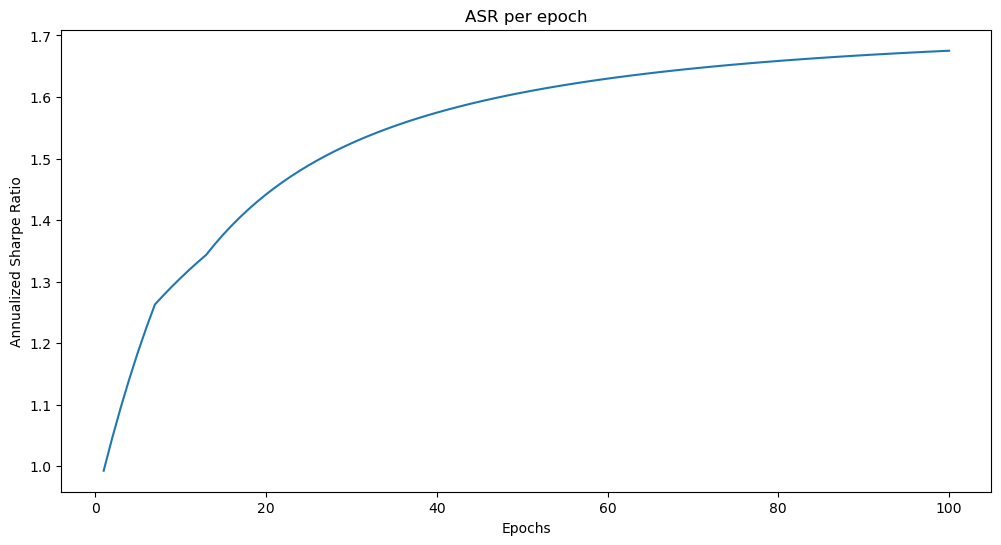

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(arr, SRarr)
plt.xlabel("Epochs")
plt.ylabel("Annualized Sharpe Ratio")
plt.title("ASR per epoch")
plt.show()

In [13]:
test = yf.download('^GSPC', start='2023-01-01', end='2024-12-31', progress=False)
test_prices = test['Close']

In [14]:
test_scaled_prices = []

for i in range(len(test_prices)):
    x = test_prices.squeeze().iloc[i]
    y = (x - test_prices.squeeze().min()) / (test_prices.squeeze().max() - test_prices.squeeze().min())
    test_scaled_prices.append(y)

In [15]:
test_log_returns = []

for i in range(1,len(test_prices)):
    x = np.log(test_prices.squeeze().iloc[i]) - np.log(test_prices.squeeze().iloc[i-1])
    test_log_returns.append(x)

test_log_returns.insert(0,0)

In [16]:
test_smooth_prices = []
test_smooth_prices.append(test_prices.squeeze().iloc[1])
test_alpha = 2/5

for i in range(2, len(test_prices)):
    x = test_prices.squeeze().iloc[i]
    y = test_smooth_prices[-1]
    z = test_prices.squeeze().iloc[i-2]

    p = test_alpha * (x + (0.5 * (x-z))) + (1-test_alpha) * y
    test_smooth_prices.append(p)

In [17]:
test_X = pd.DataFrame({
    'SPrices': test_smooth_prices,
    'Close Prices': test_prices.squeeze()[1:],
    # 'Log Returns': test_log_returns,
    # 'Scaled Prices': test_scaled_prices
})

test_X['PCT'] = test_X['SPrices'].pct_change() * 100
test_X['PCT-1'] = test_X['PCT'].shift(1)
test_X['PCT-2'] = test_X['PCT'].shift(2)
test_X['PCT-3'] = test_X['PCT'].shift(3)
test_X['PCT-4'] = test_X['PCT'].shift(4)
test_X['PCT-5'] = test_X['PCT'].shift(5)
test_X['PCT-6'] = test_X['PCT'].shift(6)
test_X['PCT-7'] = test_X['PCT'].shift(7)

test_X['Volatility'] = test_X['PCT'].rolling(window=5).std().shift(1)

test_X = test_X.dropna()
test_X

,SPrices,Close Prices,PCT,PCT-1,PCT-2,PCT-3,PCT-4,PCT-5,PCT-6,PCT-7,Volatility
Date,,,,,,,,,,,
2023-01-17,3992.286035,3990.969971,0.043168,0.390212,0.676701,1.024079,0.394306,0.709268,0.880221,-0.549081,0.262876
2023-01-18,3952.869668,3928.860107,-0.987313,0.043168,0.390212,0.676701,1.024079,0.394306,0.709268,0.880221,0.366620
2023-01-19,3912.837865,3898.850098,-1.012728,-0.987313,0.043168,0.390212,0.676701,1.024079,0.394306,0.709268,0.770150
2023-01-20,3945.496762,3972.610107,0.834660,-1.012728,-0.987313,0.043168,0.390212,0.676701,1.024079,0.394306,0.783271
2023-01-23,3999.414073,4019.810059,1.366553,0.834660,-1.012728,-0.987313,0.043168,0.390212,0.676701,1.024079,0.828255
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,5957.033674,5974.069824,0.795610,0.569291,-1.135511,-1.901801,-0.098039,0.223182,-0.189004,-0.041424,1.023710
2024-12-24,6012.074208,6040.040039,0.923959,0.795610,0.569291,-1.135511,-1.901801,-0.098039,0.223182,-0.189004,1.145211
2024-12-26,6034.984466,6037.589844,0.381071,0.923959,0.795610,0.569291,-1.135511,-1.901801,-0.098039,0.223182,1.285008


In [18]:
sma_windows = [20, 50, 100, 200]

# Compute multiple SMAs
for window in sma_windows:
    test_X[f"SMA_{window}"] = test_X['PCT'].rolling(window=window).mean().shift(1)

test_X = test_X.dropna()
test_X

,SPrices,Close Prices,PCT,PCT-1,PCT-2,PCT-3,PCT-4,PCT-5,PCT-6,PCT-7,Volatility,SMA_20,SMA_50,SMA_100,SMA_200
Date,,,,,,,,,,,,,,,
2023-11-01,4219.021250,4237.859863,0.866387,0.790891,0.511106,-0.740247,-1.229112,-0.625735,0.339516,-0.581109,0.866392,-0.081419,-0.094713,-0.022289,0.025300
2023-11-02,4283.320660,4317.779785,1.524036,0.866387,0.790891,0.511106,-0.740247,-1.229112,-0.625735,0.339516,0.960224,-0.037205,-0.078666,-0.016553,0.029416
2023-11-03,4337.424330,4358.339844,1.263124,1.524036,0.866387,0.790891,0.511106,-0.740247,-1.229112,-0.625735,0.831407,0.029597,-0.059455,-0.007432,0.041973
2023-11-06,4358.486629,4365.979980,0.485595,1.263124,1.524036,0.866387,0.790891,0.511106,-0.740247,-1.229112,0.401264,0.059749,-0.025805,-0.002397,0.053352
2023-11-07,4370.451938,4378.379883,0.274529,0.485595,1.263124,1.524036,0.866387,0.790891,0.511106,-0.740247,0.408981,0.044061,-0.014653,-0.000718,0.051607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,5957.033674,5974.069824,0.795610,0.569291,-1.135511,-1.901801,-0.098039,0.223182,-0.189004,-0.041424,1.023710,-0.020279,0.045397,0.075969,0.071832
2024-12-24,6012.074208,6040.040039,0.923959,0.795610,0.569291,-1.135511,-1.901801,-0.098039,0.223182,-0.189004,1.145211,-0.000536,0.055198,0.086635,0.075925
2024-12-26,6034.984466,6037.589844,0.381071,0.923959,0.795610,0.569291,-1.135511,-1.901801,-0.098039,0.223182,1.285008,0.029915,0.059921,0.111616,0.081975


In [19]:
test_Data = pd.DataFrame()

test_Data['Close Prices'] = test_X['Close Prices']
test_Data['SPrices'] = test_X['SPrices']
test_Data['PCT today'] = test_X['PCT']
test_Data['PCT today-1'] = test_X['PCT-1']
test_Data['PCT today-2'] = test_X['PCT-2']
test_Data['PCT today-3'] = test_X['PCT-3']
test_Data['PCT today-4'] = test_X['PCT-4']
test_Data['PCT today-5'] = test_X['PCT-5']
test_Data['PCT today-6'] = test_X['PCT-6']
test_Data['PCT today-7'] = test_X['PCT-7']
test_Data['Volatility'] = test_X['Volatility']
test_Data['SMA_20'] = test_X['SMA_20']
test_Data['SMA_50'] = test_X['SMA_50']
test_Data['SMA_100'] = test_X['SMA_100']
test_Data['SMA_200'] = test_X['SMA_200']

test_Data = test_Data.dropna()

test_Data

,Close Prices,SPrices,PCT today,PCT today-1,PCT today-2,PCT today-3,PCT today-4,PCT today-5,PCT today-6,PCT today-7,Volatility,SMA_20,SMA_50,SMA_100,SMA_200
Date,,,,,,,,,,,,,,,
2023-11-01,4237.859863,4219.021250,0.866387,0.790891,0.511106,-0.740247,-1.229112,-0.625735,0.339516,-0.581109,0.866392,-0.081419,-0.094713,-0.022289,0.025300
2023-11-02,4317.779785,4283.320660,1.524036,0.866387,0.790891,0.511106,-0.740247,-1.229112,-0.625735,0.339516,0.960224,-0.037205,-0.078666,-0.016553,0.029416
2023-11-03,4358.339844,4337.424330,1.263124,1.524036,0.866387,0.790891,0.511106,-0.740247,-1.229112,-0.625735,0.831407,0.029597,-0.059455,-0.007432,0.041973
2023-11-06,4365.979980,4358.486629,0.485595,1.263124,1.524036,0.866387,0.790891,0.511106,-0.740247,-1.229112,0.401264,0.059749,-0.025805,-0.002397,0.053352
2023-11-07,4378.379883,4370.451938,0.274529,0.485595,1.263124,1.524036,0.866387,0.790891,0.511106,-0.740247,0.408981,0.044061,-0.014653,-0.000718,0.051607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,5974.069824,5957.033674,0.795610,0.569291,-1.135511,-1.901801,-0.098039,0.223182,-0.189004,-0.041424,1.023710,-0.020279,0.045397,0.075969,0.071832
2024-12-24,6040.040039,6012.074208,0.923959,0.795610,0.569291,-1.135511,-1.901801,-0.098039,0.223182,-0.189004,1.145211,-0.000536,0.055198,0.086635,0.075925
2024-12-26,6037.589844,6034.984466,0.381071,0.923959,0.795610,0.569291,-1.135511,-1.901801,-0.098039,0.223182,1.285008,0.029915,0.059921,0.111616,0.081975


In [20]:
input_test_data = test_Data.drop(columns=['Close Prices', 'PCT today', 'SPrices'])

/var/folders/0f/84czy2195_s4j094wj7xpbb80000gn/T/ipykernel_45985/2497003988.py:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  shares_to_buy = min(int((trading_capital * allocation) / current_price), max_shares_to_buy)
/var/folders/0f/84czy2195_s4j094wj7xpbb80000gn/T/ipykernel_45985/2497003988.py:52: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  shares_to_sell = int((trading_capital * abs(allocation)) / current_price)


Final Portfolio Value: 727163.5576171875
Shares Held: 123
Cash: 609.94482421875


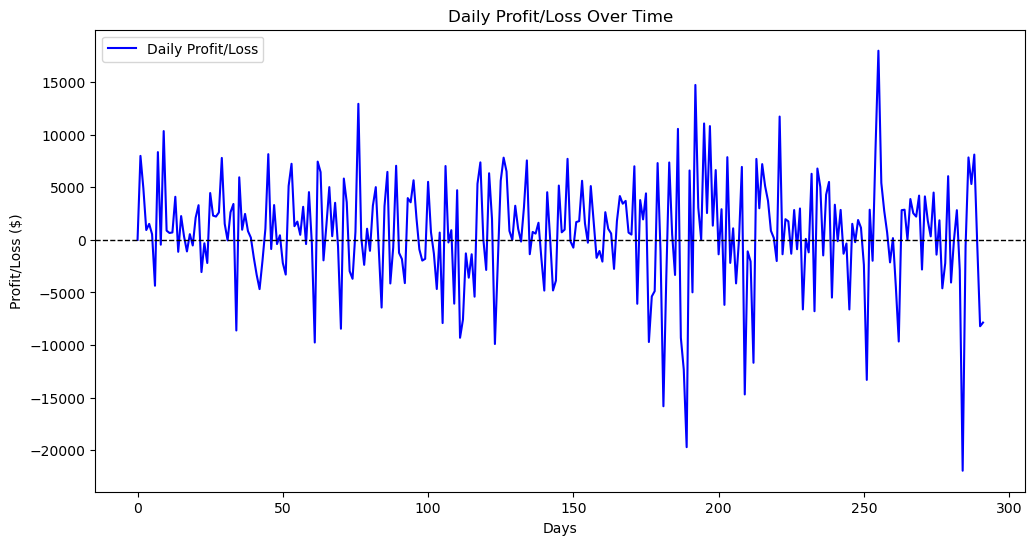

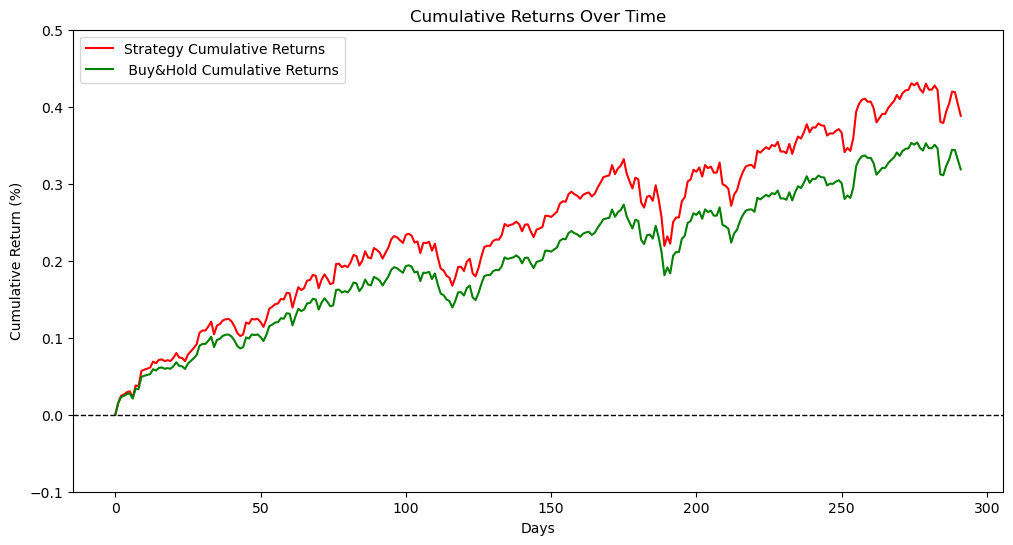

In [21]:
# Initialize tracking variables
portfolio_values = []
profits = []
cumulative_returns = []
allocations = []

# Initialize portfolio
initial_shares = 100
initial_cash = 100000  # Start with no cash
portfolio_value = initial_shares * test_Data['Close Prices'].iloc[0] + initial_cash # Initial portfolio value
trading_capital = 0.2 * portfolio_value  # 20% of portfolio value for trading
shares_held = initial_shares
cash = initial_cash

cumulative_returns.append(0)
portfolio_values.append(portfolio_value)
profits.append(0)

buy_and_hold_value = initial_shares * test_Data['Close Prices'].iloc[0] + initial_cash
buy_and_hold_cumulative_returns = []
buy_and_hold_cumulative_returns.append(0)

# Trading simulation
for i in range(1,len(input_test_data)):
    current_price = test_Data['Close Prices'].iloc[i]
    current_input = input_test_data.iloc[i]
    current_input = current_input.to_numpy().reshape(1, -1)
    
    # Forward Pass
    hidden_input = np.dot(current_input, weights1) + hiddenbias
    hidden_output = tanh(hidden_input)
    
    output_input = np.dot(hidden_output, weights2) + outbias
    allocation = tanh(output_input)
    allocations.append(allocation)

    # Recalculate trading capital dynamically
    # trading_capital = 0.2 * portfolio_value

    # Trading logic with risk management
    if allocation > 0:  # Buy signal
        # Calculate the number of shares to buy, ensuring cash does not go negative
        max_shares_to_buy = int(cash / current_price) if cash > 0 else 0
        shares_to_buy = min(int((trading_capital * allocation) / current_price), max_shares_to_buy)
        cost = shares_to_buy * current_price
        
        # Update portfolio
        shares_held += shares_to_buy
        cash -= cost
    elif allocation < 0:  # Sell signal
        # Calculate the number of shares to sell
        shares_to_sell = int((trading_capital * abs(allocation)) / current_price)
        shares_to_sell = min(shares_to_sell, shares_held)  # Cannot sell more than held
        revenue = shares_to_sell * current_price
        
        # Update portfolio
        shares_held -= shares_to_sell
        cash += revenue

    # Update portfolio value
    new_portfolio_value = shares_held * current_price + cash
    daily_profit = new_portfolio_value - portfolio_values[i-1]  # Profit on this day
    portfolio_values.append(new_portfolio_value)
    profits.append(daily_profit)

    # Calculate cumulative return
    cumulative_returns.append((new_portfolio_value / portfolio_values[0]) - 1)
    buy_and_hold_cumulative_returns.append(((initial_shares * current_price + initial_cash) / buy_and_hold_value) - 1)
    
    # Update portfolio value
    portfolio_value = new_portfolio_value

# Final portfolio value
print(f"Final Portfolio Value: {portfolio_value}")
print(f"Shares Held: {shares_held}")
print(f"Cash: {cash}")

# Plot daily profits
plt.figure(figsize=(12, 6))
plt.plot(profits, label="Daily Profit/Loss", color="blue")
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Zero-profit line
plt.xlabel("Days")
plt.ylabel("Profit/Loss ($)")
plt.title("Daily Profit/Loss Over Time")
plt.legend()
plt.show()

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns, label="Strategy Cumulative Returns", color="red")
plt.plot(buy_and_hold_cumulative_returns, label=" Buy&Hold Cumulative Returns", color="green")
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Zero return line
plt.ylim(-0.1,0.5)
plt.xlabel("Days")
plt.ylabel("Cumulative Return (%)")
plt.title("Cumulative Returns Over Time")
plt.legend()
plt.show()

# Plot buy and hold
# plt.figure(figsize=(12, 6))
# plt.plot(buy_and_hold_cumulative_returns, label="Cumulative Returns", color="green")
# plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Zero return line
# plt.xlabel("Days")
# plt.ylabel("Cumulative Return (%)")
# plt.title("Buy and Hold Cumulative Returns Over Time")
# plt.legend()
# plt.show()

In [22]:
# Calculation for Asset Returns and Mu
asset_returns = allocations * test_Data['PCT today'].values
average_daily_return = np.mean(asset_returns)
average_daily_excess_return = average_daily_return - k
    
# Calculation of Standard deviation
squared_deviations = np.square(asset_returns - average_daily_excess_return)
sigma = np.sqrt(np.mean(squared_deviations))
    
# Annulaized Sharpe Ratio
annualized_SR = np.sqrt(T) * (average_daily_excess_return / sigma)
print(f"Annualized Sharpe Ratio: {annualized_SR}")

Annualized Sharpe Ratio: 3.3369489556306657


In [23]:
# Calculate daily returns
daily_returns = np.diff(portfolio_values) / portfolio_values[:-1]

# Calculate average daily return
average_daily_return = np.mean(daily_returns)

# Calculate standard deviation of daily returns
std_dev_daily_returns = np.std(daily_returns)

# Annualize the average daily return and standard deviation
annualized_return = average_daily_return * 253
annualized_std_dev = std_dev_daily_returns * np.sqrt(253)

# Risk-free rate
risk_free_rate = 0.0002

# Calculate Sharpe Ratio
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_std_dev

print(f"Sharpe Ratio: {sharpe_ratio}")

Sharpe Ratio: 2.368293950182601


In [24]:
sum(profits)

203377.5712890625

In [25]:
sum(allocations)

array([[222.44995087]])

In [26]:
allocations

[array([[0.90511728]]),
 array([[0.91767207]]),
 array([[0.94123297]]),
 array([[0.95782926]]),
 array([[0.93101518]]),
 array([[0.55524496]]),
 array([[0.39115462]]),
 array([[0.40663428]]),
 array([[0.51166509]]),
 array([[0.92794625]]),
 array([[0.94262074]]),
 array([[0.91167443]]),
 array([[0.94509709]]),
 array([[0.5247502]]),
 array([[0.79741879]]),
 array([[0.64087423]]),
 array([[0.57264905]]),
 array([[0.69021119]]),
 array([[0.81111369]]),
 array([[0.53518755]]),
 array([[0.79831625]]),
 array([[0.88244899]]),
 array([[0.85682605]]),
 array([[0.86972029]]),
 array([[0.67019856]]),
 array([[0.75520409]]),
 array([[0.89329639]]),
 array([[0.87585312]]),
 array([[0.92412554]]),
 array([[0.93600604]]),
 array([[0.95123823]]),
 array([[0.93125927]]),
 array([[0.85602595]]),
 array([[0.79125268]]),
 array([[0.6524371]]),
 array([[0.45680425]]),
 array([[0.41335238]]),
 array([[0.86735363]]),
 array([[0.93032378]]),
 array([[0.7416946]]),
 array([[0.93045107]]),
 array([[0.72568453

In [27]:
min(allocations)

array([[-0.0071637]])